### PULP przykład #3

https://dzone.com/articles/linear-programming-with-python

#### $
\left\{
\begin{align} 
{x_{1}+2x_{1}} & \leqslant 4 & (1)\\
{4x_{1}+2x_{2}} & \leqslant 12 & (2)\\
{-x_{1}+x_{2}} & \leqslant 1 & (3)\\
{x_{1}} & \geqslant 0 & (4)\\
{x_{2}} & \geqslant 0 & (5)\\
\end{align}
\right. 
$

$\bbox[5px,border:1px solid red]
{
\\
F(x_1,x_2) =x_{1} + x_{2}   \to  max 
\qquad 
} $

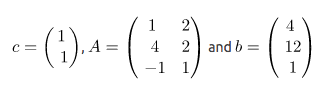

In [3]:
from pulp import *
from fractions import Fraction

# zdefiniowanie problemu- to jest taka platforma do wrzucania na nia wszystkiego

prob = LpProblem("Example_of_maximum",LpMaximize)

Wstawianie pierwszych warunków ograniczających

#### $
\left\{
\begin{align} 
{x_{1}} & \geqslant 0 & (4)\\
{x_{2}} & \geqslant 0 & (5)\\
\end{align}
\right. 
$

In [4]:
x1=LpVariable("x1",0)
x2=LpVariable("x2",0)

### Dodajemy do platformy funkcje celu

In [5]:
# objective function
prob += x1 + x2, "Maximum value of x1 + x2"

In [6]:
print(prob)

Example_of_maximum:
MAXIMIZE
1*x1 + 1*x2 + 0
VARIABLES
x1 Continuous
x2 Continuous



### Dodajemy do platformy główne warunki brzegowe

In [7]:
# main constraints
prob += x1 + 2*x2 <= 4, "constraint 1"
prob += 4*x1 + 2*x2 <= 12, "constraint 2"
prob += -x1 + x2 <= 1, "constraint 3"

In [8]:
print(prob)

Example_of_maximum:
MAXIMIZE
1*x1 + 1*x2 + 0
SUBJECT TO
constraint_1: x1 + 2 x2 <= 4

constraint_2: 4 x1 + 2 x2 <= 12

constraint_3: - x1 + x2 <= 1

VARIABLES
x1 Continuous
x2 Continuous



### Rozwiązanie problemu

In [10]:
print("prob.solve",prob.solve())
# status of the solution
print(f"Status: {LpStatus[prob.status]}")

prob.solve 1
Status: Optimal


In [12]:
for v in prob.variables():
    print(f"{v.name} = {str(Fraction(v.varValue).limit_denominator())}")


x1 = 8/3
x2 = 2/3


In [13]:
# maximum value of the objective function
print(f"max (x1 + x2) = {str(Fraction(value(prob.objective)).limit_denominator())}")

max (x1 + x2) = 10/3
